## 2019 Fordgobike Dataset Exploration and Visualization
## by MANAHIL SIDDIQUI 

## Investigation Overview

> In this analysis, we delve into the Ford GoBike System Dataset to uncover the intriguing interplay between three pivotal variables: 'User Type,' 'Day of the Week,' and 'Trip Duration.' Our goal is to gain deeper insights into how these factors influence the number of trips and their intricate relationships.

## Dataset Overview and Executive Summary

**Dataset Review:**

The Ford GoBike System Dataset for February 2019 provides a robust foundation for analysis, encompassing data on user types, trip durations, gender, and timestamps. With over 180,000 records, it offers a comprehensive view of bike-sharing activities in the San Francisco Bay area.

**Executive Summary:**

Our analysis of the dataset uncovered key insights:

1. **User Behavior: Subscribers vs. Customers**:
   - Subscribers dominate weekdays, possibly commuting.
   - Customers prefer weekends, suggesting leisure use.

2. **Efficiency in Action: Trip Durations**:
   - Most trips are short, with a peak at 10 minutes.
   - Highlights the service's efficiency for quick urban travel.

3. **Exploring Gender Differences: Trip Durations**:
   - Males have slightly shorter trip durations.
   - Reflects diverse travel patterns and purposes.

4. **Trips in Weekdays per User Type**:
   - Both user types have longer weekend trips.
   - Subscribers generally have shorter trips.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
#load data set
df=pd.read_csv('copiedBike.csv')

#get the first 5 rows
df.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,user_age,start_date,Trip_day of the week,Trip_hour of the day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,869.750000,35,02/28/19,Thursday,17
1,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,1030.900000,47,02/28/19,Thursday,12
2,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,608.166667,30,02/28/19,Thursday,17
3,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,26.416667,45,02/28/19,Thursday,23
4,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,29.883333,60,02/28/19,Thursday,23



1. **"Unveiling User Behavior: Subscribers vs. Customers"**
   - "What secrets does the data hold about how Subscribers and Customers engage with our bike-sharing service, and how can we optimize their experiences?"

2. **"Efficiency in Action: Trip Durations"**
   - "How efficiently do our users utilize our bike-sharing service, and what does the distribution of trip durations reveal about their travel patterns?"

3. **"Exploring Gender Differences: Trip Durations"**
   - "Do gender-based differences influence trip durations in our bike-sharing system, and what implications does this have for tailoring our services?"

4. **"Trips Duration in Weekdays per User Type"**
   - "How do trip durations vary between different days of the week for Subscribers and Customers, and what can we learn from these fluctuations?"


    


### Unveiling User Behavior: Subscribers vs. Customers
"In our dataset, 'Subscribers' account for around 12,000 trips, In contrast, 'Customers' represent fewer than 2,000 trips, These disparities offer valuable insights for optimizing services and enhancing user satisfaction."


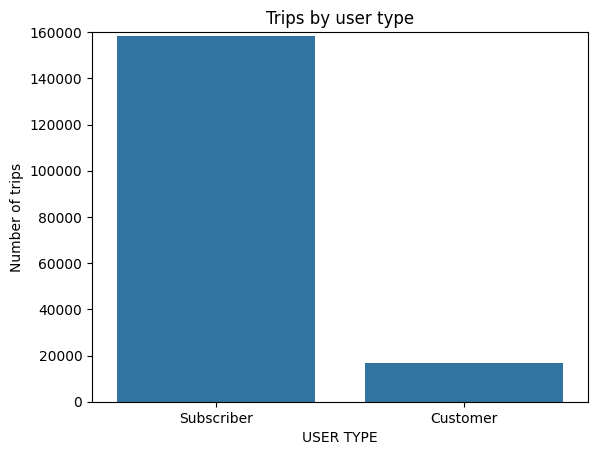

In [5]:

order = df['user_type'].value_counts().index
sns.countplot(data=df,x='user_type',color='tab:blue',order = order);
plt.xlabel('USER TYPE')
plt.ylabel('Number of trips')
plt.title('Trips by user type')

plt.ylim(0,160000);
plt.show()



 ### Efficiency in Action: Trip Durations
 
 Our data reveals a remarkable trend - the vast majority of trips clock in at under 15 minutes, with the peak duration being a mere 10 minutes. This highlights the efficiency and convenience our service offers, catering to quick and seamless urban travel

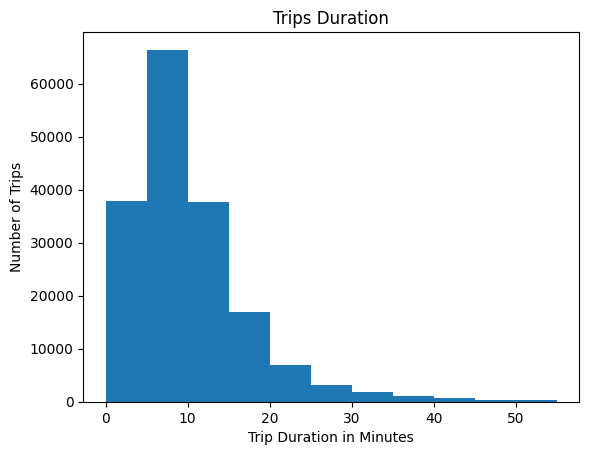

In [6]:
# Exploring trip duration variable in terms of the number of trips

# Define the bins for the histogram
bins = np.arange(0, 60, 5)

# Create a histogram to visualize the distribution of trip durations
plt.hist(data=df, x='duration_min', bins=bins)

# Label the x-axis
plt.xlabel('Trip Duration in Minutes')

# Label the y-axis
plt.ylabel('Number of Trips')

plt.title('Trips Duration')

# Display the histogram
plt.show()


## "Exploring Gender Differences: Trip Durations"

Intriguingly, males tend to have slightly shorter trip durations than females. This variance may be influenced by factors such as travel patterns and route choices. Acknowledging these gender-based distinctions informs our efforts to tailor our services to meet the unique preferences and needs of all users

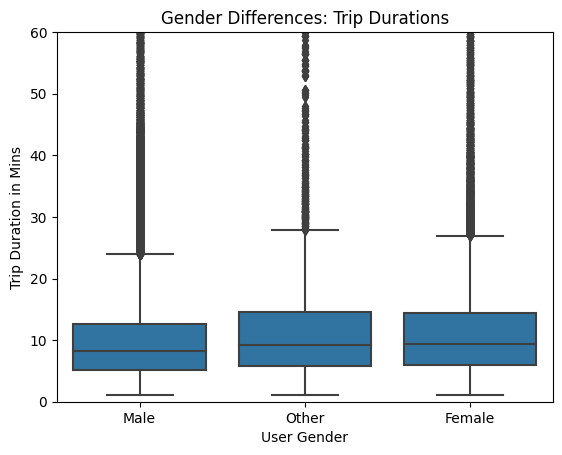

In [7]:
# Create a boxplot to explore the relationship between user gender and trip duration
sns.boxplot(data=df, x='member_gender', y="duration_min", color = 'tab:blue')
# Label the x-axis
plt.xlabel('User Gender')
# Label the y-axis
plt.ylabel('Trip Duration in Mins')

plt.title('Gender Differences: Trip Durations')

# Set the y-axis limits to control the range of values displayed
plt.ylim(0,60);

### Weekend Adventures: Unveiling User Types and Trip Durations
We notice that Subscribers have the lowest number of trips in the weekend holiday (Saturday and Sunday) while Customers have the lowest number of trips on Wednesday and have realtively better numbers of trips in the weekend holiday (Saturday and Sunday)

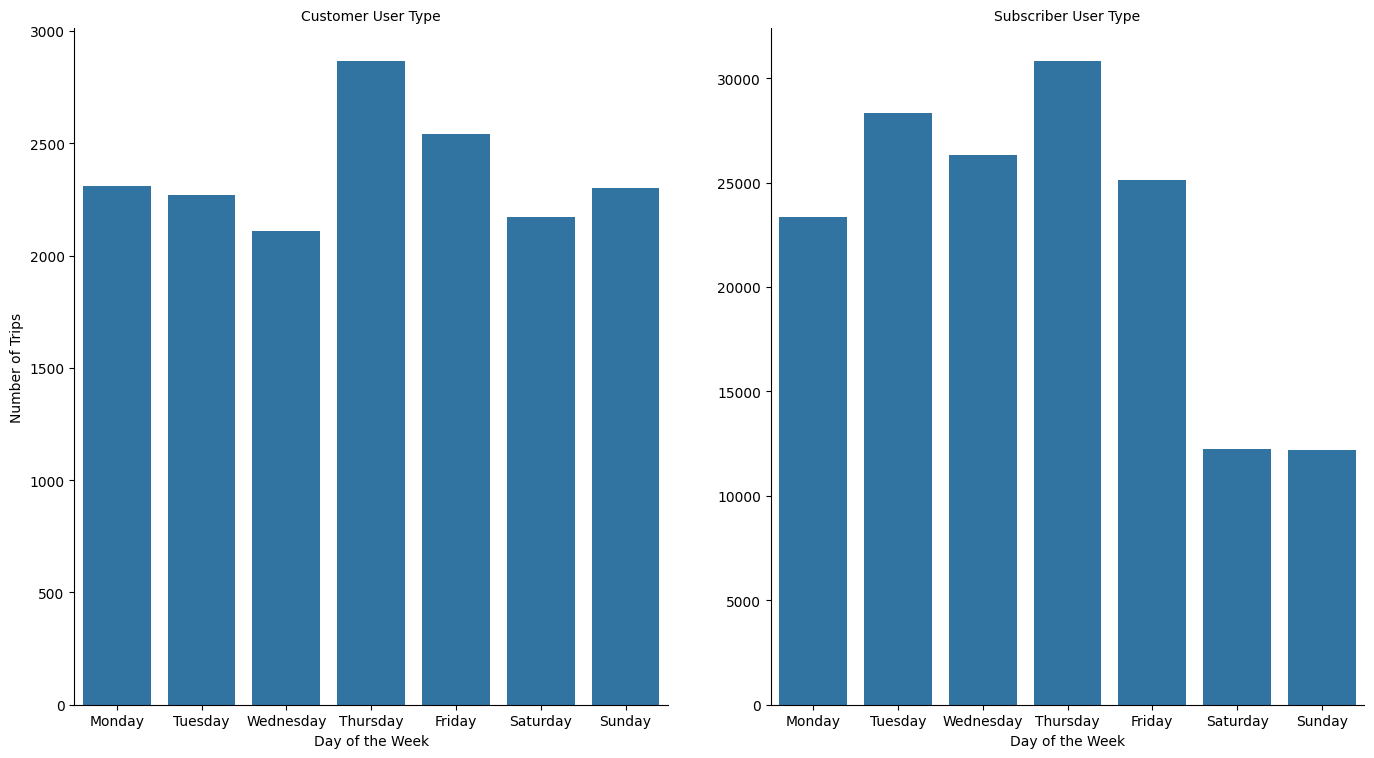

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the order of weekdays for the x-axis
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create a categorical plot (catplot) to explore the distribution of trips by user type and day of the week
g = sns.catplot(data=df, x='Trip_day of the week', col="user_type", order=weekday_order, kind='count', sharey=False, color='tab:blue', height=6)

# Set plot height for better visibility
g.fig.set_size_inches(14, 8)

# Set plot titles and axis labels
g.set_axis_labels('Day of the Week', 'Number of Trips')
g.set_titles('{col_name} User Type')

# Display the plot
plt.show()
